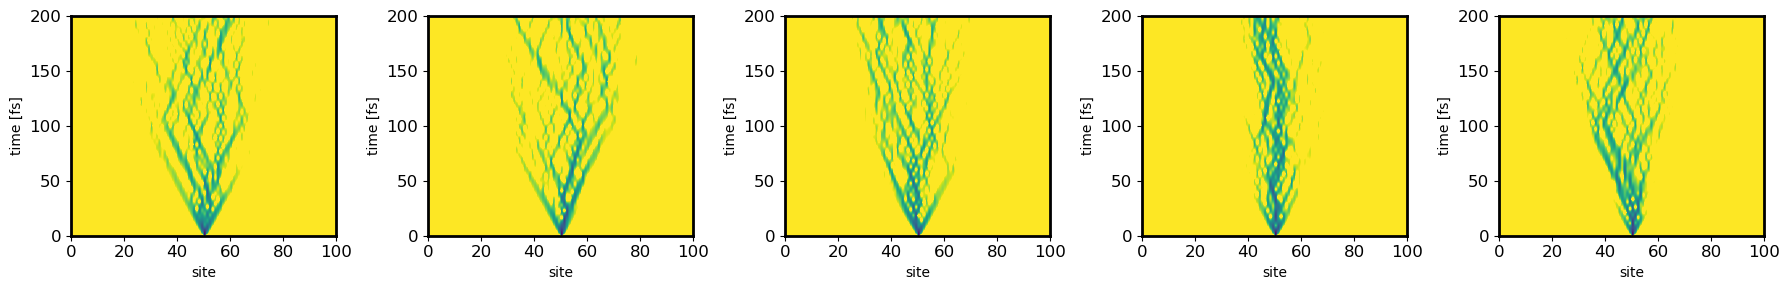

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['lines.markersize'] = 5

V = 83
ns = 100
temp_list = [200, 250, 300, 350, 400]

fig, ax = plt.subplots(1, len(temp_list), figsize=(18, 3))
for idx, temp in enumerate(temp_list):
    data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
    x = np.load(os.path.join(data_folder, 'site_occupation_traj.npy'))
    nsample, batchsize, ns = x.shape
    
    batch_idx = 10  # pick an arbitrary trajectory and plot evolvement of site occupation as heatmap
    ax[idx].imshow(-np.log(x[:,batch_idx,:]+1e-10), aspect='auto', cmap='viridis', origin='lower', extent=[0, ns, 0, nsample], vmin=0, vmax=4)
    ax[idx].set_xlabel('site')
    ax[idx].set_ylabel('time [fs]')
plt.tight_layout()
plt.show()
plt.close()



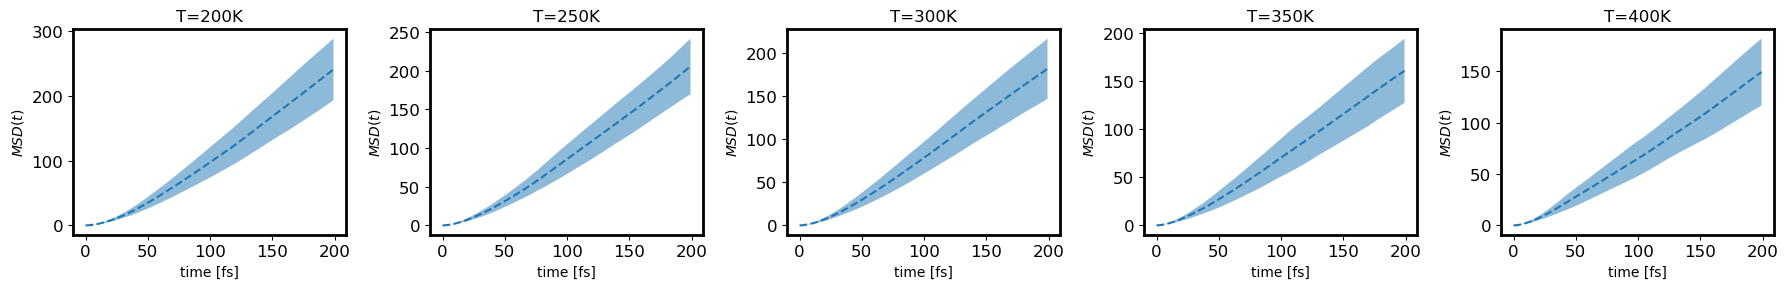

In [3]:
## plot mean squared displacement
fig, ax = plt.subplots(1, len(temp_list), figsize=(18, 3))
for idx, temp in enumerate(temp_list):
    data_folder = 'T{:.0f}_ns{}'.format(temp, ns)
    MSD_traj = np.load(os.path.join(data_folder, 'MSD_traj.npy'))
    t_traj = np.arange(MSD_traj.shape[0])
    ax[idx].plot(t_traj, MSD_traj.mean(-1), '--')
    ax[idx].fill_between(t_traj, MSD_traj.mean(-1)+MSD_traj.std(-1) ,MSD_traj.mean(-1)-MSD_traj.std(-1) , alpha=0.5)
    ax[idx].set_title('T={}K'.format(temp))
    ax[idx].set_xlabel('time [fs]')
    ax[idx].set_ylabel(r'$MSD(t)$')
plt.tight_layout()
plt.show()
plt.close()